In [40]:
%matplotlib inline
import seaborn as sns
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import pickle5 as pickle

sns.set_theme(style="white", font='cmr10.ttf')

In [42]:
prior = "lasso_alternative"
parameter = "a0_lasso"
start = 1e-3
finish = 2
interval = 64
M = 3

with open(f'../sensitivity/results_{M}_{prior}_{parameter}_{start}_{finish}_{interval}.pkl"', 'rb') as f:
        sensitivity_results = pickle.load(f)

In [43]:
parameter = sensitivity_results[1][0]
derivatives = sensitivity_results[1][1]

In [44]:
parameter_a0 = np.block(sensitivity_results[0])[:,0]
derivatives_a0 = np.block(sensitivity_results[0])[:,1:].flatten()

## Lasso: $a_{0}$

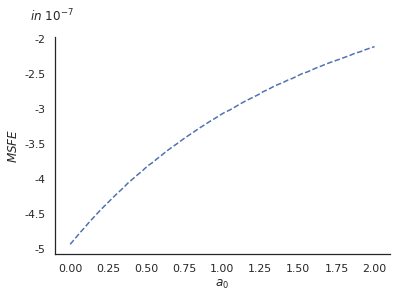

In [45]:

dataset = np.array([parameter_a0, derivatives_a0]).T
data = pd.DataFrame(dataset, columns=["parameter", "derivatives"])
#data = pd.DataFrame(np.block(sensitivity_results[0])[:,1:], index=np.block(sensitivity_results[0])[:,0], columns=["1-step","2-step","3-step","4-step","5-step","6-step","7-step","8-step"])

fig = sns.lineplot(y="derivatives", x="parameter", data=data, linestyle="dashed", palette="pastel", legend=False)
fig.set_xlabel("$a_{0}$")
fig.set_ylabel("$\it{MSFE}$")
#fig.set_yticklabels(["","","-8","-6","-4","-2"])
#fig.set_yticklabels(["","-10","-8","-6","-4","-2","0"])
fig.set_yticklabels(["","-5","-4.5","-4","-3.5","-3","-2.5","-2"])
fig.text(-0.075,1.075, "$\it{in}$ $10^{-7}$", transform=fig.transAxes)

sns.despine()        

## Lasso: $b_{0}$

In [46]:
prior = "lasso_alternative"
parameter = "b0_lasso"
start = 1e-3
finish = 0.5
interval = 64

with open(f'../sensitivity/results_{M}_{prior}_{parameter}_{start}_{finish}_{interval}.pkl"', 'rb') as f:
        sensitivity_results = pickle.load(f)

In [47]:
parameter_b0 = sensitivity_results[1][0]
derivatives_b0 = sensitivity_results[1][1].flatten()

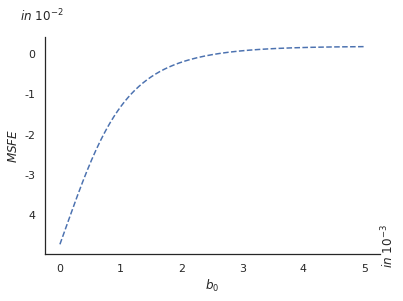

In [51]:
dataset = np.array([parameter_b0, derivatives_b0]).T
data = pd.DataFrame(dataset, columns=["parameter", "derivatives"])

#data = pd.DataFrame(np.block(sensitivity_results[0])[:,1:], index=np.block(sensitivity_results[0])[:,0], columns=["1-step","2-step","3-step","4-step","5-step","6-step","7-step","8-step"])
fig = sns.lineplot(y="derivatives", x="parameter", data=data, linestyle="dashed", palette="pastel", legend=False)
fig.set_xlabel("$b_{0}$")
fig.set_ylabel("$\it{MSFE}$")
fig.set_xticklabels(["","0","1","2","3","4","5"])
fig.set_yticklabels(["","4","-3", "-2","-1", "0"])
fig.text(1,-0.05, "$\it{in}$ $10^{-3}$", rotation="vertical", transform=fig.transAxes)
fig.text(-0.075,1.075, "$\it{in}$ $10^{-2}$", transform=fig.transAxes)

sns.despine()

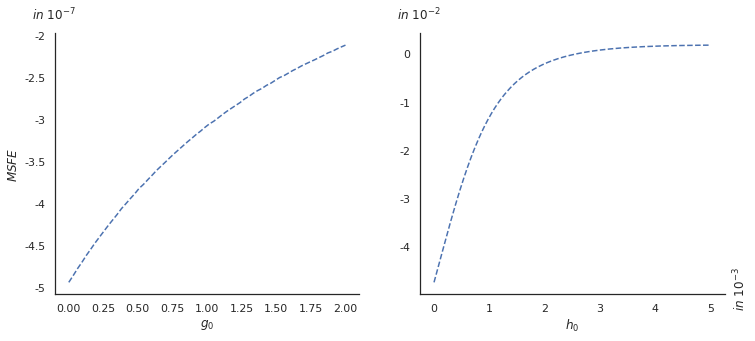

In [55]:
f = plt.figure(figsize=(12,4.8))
gs = f.add_gridspec(1,2)

#f.suptitle("Derivatives for the Lasso prior in $M = 3$", y = 1.05)

## a_0

f.add_subplot(gs[0,0])

dataset = np.array([parameter_a0, derivatives_a0]).T
data = pd.DataFrame(dataset, columns=["parameter", "derivatives"])

fig = sns.lineplot(y="derivatives", x="parameter", data=data, linestyle="dashed", palette="pastel", legend=False)
fig.set_xlabel("$g_{0}$")
fig.set_ylabel("$\it{MSFE}$")
fig.set_yticklabels(["","-5","-4.5","-4","-3.5","-3","-2.5","-2"])
fig.text(-0.075,1.05, "$\it{in}$ $10^{-7}$", transform=fig.transAxes)

sns.despine()        

## b_0

f.add_subplot(gs[0,1])

dataset = np.array([parameter_b0, derivatives_b0]).T
data = pd.DataFrame(dataset, columns=["parameter", "derivatives"])

fig = sns.lineplot(y="derivatives", x="parameter", data=data, linestyle="dashed", palette="pastel", legend=False)
fig.set_xlabel("$h_{0}$")
fig.set_ylabel("") #$\it{MSFE}$
fig.set_xticklabels(["","0","1","2","3","4","5"])
fig.set_yticklabels(["","-4","-3", "-2","-1", "0"])
fig.text(1.025,-0.05, "$\it{in}$ $10^{-3}$", rotation="vertical", transform=fig.transAxes)
fig.text(-0.075,1.05, "$\it{in}$ $10^{-2}$", transform=fig.transAxes)

sns.despine()

plt.savefig("../visualisations/lasso_complete.svg")

## H-step

In [31]:
prior = "lasso_alternative"
parameter = "a0_lasso"
start = 1e-3
finish = 2
interval = 64
M = 3

with open(f'../sensitivity/results_{prior}_{parameter}_{start}_{finish}_{interval}_hstep.pkl"', 'rb') as f:
        sensitivity_results = pickle.load(f)

In [32]:
parameter_a0 = np.block(sensitivity_results[0])[:,0]
derivatives_a0 = np.block(sensitivity_results[0])[:,1:]

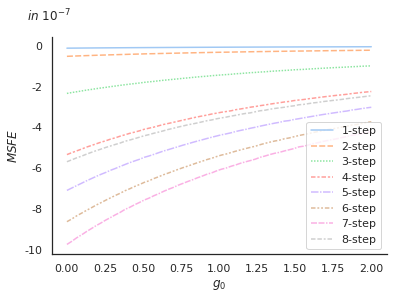

In [41]:

#dataset = np.array([parameter_a0, derivatives_a0]).T
#data = pd.DataFrame(dataset, columns=["parameter", "derivatives"])
data = pd.DataFrame(np.block(sensitivity_results[0])[:,1:], index=np.block(sensitivity_results[0])[:,0], columns=["1-step","2-step","3-step","4-step","5-step","6-step","7-step","8-step"])

fig = sns.lineplot(data=data, linestyle="dashed", palette="pastel", legend=True)
fig.set_xlabel("$g_{0}$")
fig.set_ylabel("$\it{MSFE}$")
#fig.set_yticklabels(["","","-8","-6","-4","-2"])
#fig.set_yticklabels(["","-10","-8","-6","-4","-2","0"])
fig.set_yticklabels(["","-10","-8","-6","-4","-2","0"])
fig.text(-0.075,1.075, "$\it{in}$ $10^{-7}$", transform=fig.transAxes)

sns.despine()        

#plt.savefig("../visualisations/lasso_a0_hstep.svg")

## SVSS: $g_{0}$

In [171]:
prior = "svss"
parameter = "g0"
start = 1e-2
finish = 1
interval = 64

with open(f'../sensitivity/results_{M}_{prior}_{parameter}_{start}_{finish}_{interval}_std.pkl"', 'rb') as f:
        sensitivity_results = pickle.load(f)

In [172]:
parameter_g0 = np.block(sensitivity_results[0])[:,0]
derivatives_g0 = np.block(sensitivity_results[0])[:,1:].flatten()

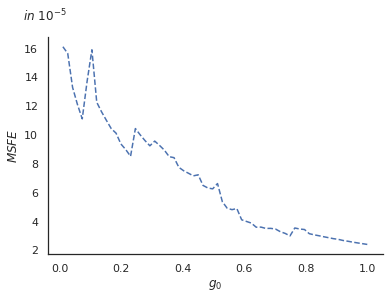

In [173]:
dataset = np.array([parameter_g0, derivatives_g0]).T
data = pd.DataFrame(dataset, columns=["parameter", "derivatives"])

fig = sns.lineplot(y="derivatives", x="parameter",data=data, linestyle="dashed", palette="pastel", legend=False)
fig.set_xlabel("$g_{0}$")
fig.set_ylabel("$\it{MSFE}$")
fig.set_yticklabels(["","2","4","6","8","10","12","14","16"])
fig.text(-0.075,1.075, "$\it{in}$ $10^{-5}$", transform=fig.transAxes)

sns.despine()

## SVSS: $h_{0}$

In [174]:
prior = "svss"
parameter = "h0"
start = 12
finish = 20
interval = 64

with open(f'../sensitivity/results_{M}_{prior}_{parameter}_{start}_{finish}_{interval}.pkl"', 'rb') as f:
        sensitivity_results = pickle.load(f)

In [175]:
parameter_h0 = np.block(sensitivity_results[0])[:,0]
derivatives_h0 = np.block(sensitivity_results[0])[:,1:].flatten()

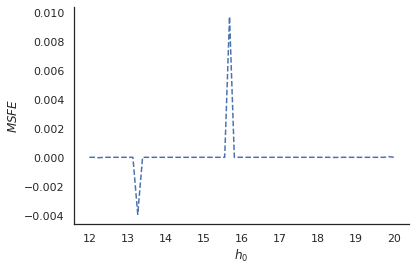

In [176]:
dataset = np.array([parameter_h0, derivatives_h0]).T
data = pd.DataFrame(dataset, columns=["parameter", "derivatives"])

# data = pd.DataFrame(np.block(sensitivity_results[0])[:,1:], index=np.block(sensitivity_results[0])[:,0], columns=["1-step","2-step","3-step","4-step","5-step","6-step","7-step","8-step"])
fig = sns.lineplot(x="parameter", y="derivatives", data=data, linestyle="dashed", palette="pastel", legend=False)
fig.set_xlabel("$h_{0}$")
fig.set_ylabel("$\it{MSFE}$")
#fig.set_xticklabels(["","2","4","6","8","10"])
#fig.set_yticklabels(["","0","1","2","3","4"])
#fig.text(1,0, "$\it{in}$ $10^{-3}$", rotation="vertical", transform=ax.transAxes)
#fig.text(-0.075,1.075, "$\it{in}$ $10^{-2}$", transform=ax.transAxes
sns.despine()

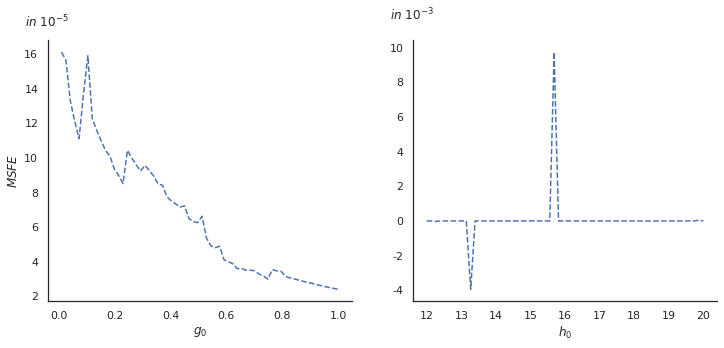

In [190]:
f = plt.figure(figsize=(12,4.8))
gs = f.add_gridspec(1,2)

dataset = np.array([parameter_g0, derivatives_g0]).T
data = pd.DataFrame(dataset, columns=["parameter", "derivatives"])

## g_0

f.add_subplot(gs[0,0])

fig = sns.lineplot(y="derivatives", x="parameter",data=data, linestyle="dashed", palette="pastel", legend=False)
fig.set_xlabel("$g_{0}$")
fig.set_ylabel("$\it{MSFE}$")
fig.set_yticklabels(["","2","4","6","8","10","12","14","16"])
fig.text(-0.075,1.05, "$\it{in}$ $10^{-5}$", transform=fig.transAxes)

## h_0

f.add_subplot(gs[0,1])

dataset = np.array([parameter_h0, derivatives_h0]).T
data = pd.DataFrame(dataset, columns=["parameter", "derivatives"])

fig = sns.lineplot(x="parameter", y="derivatives", data=data, linestyle="dashed", palette="pastel", legend=False)
fig.set_xlabel("$h_{0}$")
fig.set_ylabel("") #$\it{MSFE}$
fig.set_yticklabels(["","-4","-2","0","2","4","6","8","10"])
fig.text(-0.075,1.075, "$\it{in}$ $10^{-3}$", transform=fig.transAxes)

sns.despine()

#plt.savefig("../visualisations/svss_complete.svg")

## Horseshoe: $a_{0}$

In [16]:
prior = "horseshoe"
parameter = "a0"
start = 4
finish = 5
interval = 128
M = 3

with open(f'../sensitivity/results_{M}_{prior}_{parameter}_{start}_{finish}_{interval}.pkl"', 'rb') as f:
        sensitivity_results = pickle.load(f)

In [17]:
parameter_a0 = np.block(sensitivity_results[0])[:,0]
derivatives_a0 = np.block(sensitivity_results[0])[:,1:].flatten()

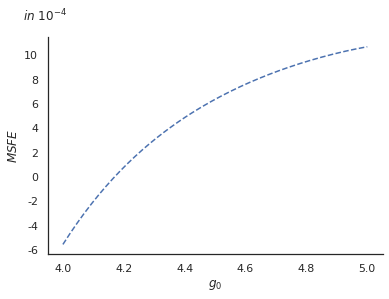

In [24]:
dataset = np.array([parameter_a0, derivatives_a0]).T
data = pd.DataFrame(dataset, columns=["parameter", "derivatives"])

# data = pd.DataFrame(np.block(sensitivity_results[0])[:,1:], index=np.block(sensitivity_results[0])[:,0], columns=["1-step","2-step","3-step","4-step","5-step","6-step","7-step","8-step"])
fig = sns.lineplot(x="parameter", y="derivatives", data=data, linestyle="dashed", palette="pastel", legend=False)
fig.set_xlabel("$g_{0}$")
fig.set_ylabel("$\it{MSFE}$")
fig.set_yticklabels(["","-6","-4","-2","0","2","4","6","8","10"])
fig.text(-0.075,1.075, "$\it{in}$ $10^{-4}$", transform=fig.transAxes)
sns.despine()